In [20]:
# -*- coding=utf-8 -*-
import project_path
from Tocas import Polynomring, PolynomringElement, Z, GanzzahlRestklassenring, GanzzahlRestklassenringElement
from Extension.Projekt import Berlekamp_Massey as LFSR
from Extension import endlicher_koerper
from Extension.PolynomRestklassenring import PolynomRestklassenring, PolynomRestklassenringElement
from Extension.endlicher_koerper import endlicher_koerper
from Extension.Bruchzahlring import Q, BruchzahlringElement
from matplotlib import pyplot as plt

In [2]:
seq = [None]*100
seq[1] = [1]
seq[2] = [1,4,5]
seq[3] = [1,4,5,45,2]
seq[4] = [1,4,5,4,2,3,5,3,5]
seq[5] = [1,4,5,45,2,3,5,3,5]
seq[6] = [1,4,5,45,2,32,5,3,5,3,4,5]
seq[7] = [1,4,5,5,2,3,5,2,3,4,6,7,8,4,5]
seq[8] = [1,4,5,45,2,2,3,5,2,3,4,6,7,8,4,5]
seq[9] = [1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5]
seq[10] = [1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34]
#20
seq[11] = [3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#30
seq[12] = [34,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#40
seq[13] = [1,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#50
seq[14] = [4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#60
seq[15] = [2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#95 -> 9,6/7
seq[16] = [ 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2]
#100 -> 10
seq[17] = [5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2]
#105 -> 12,4
seq[18] = [1, 2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2]
#110
seq[19] = [1, 2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#123 -> 19
seq[20] = [2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2,3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#132 -> 23
seq[21] = [3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2,3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#142 -> 31
seq[22] = [5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2,3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#149 -> 32
seq[23] = [2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2,3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#155 -> 37
seq[24] = [8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2,3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#163 -> 44
seq[25] = [6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2,3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]
#174 -> 52/41
seq[26] = [1, 2, 2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2,3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345, 756, 745, 2234, 675, 345, 2345, 6, 4, 345, 2345, 6, 345,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2 , 3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3,5,3,2,5,6,45,45,645,6456,46,46,46,64,6,6,5,3,2,4,7,8,8,67,5,34,3,4,5,65,76,7,8,8,8,6,45,3,2, 3, 2, 3, 12, 10, 4, 1, 2, 5, 5, 34, 24, 26, 41, 4, 6, 5, 1, 345, 6345,4,2,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,341,4,5,1,4,5,45,2,2,3,5,2,3,43, 1, 4, 7, 8, 1, 2, 834,5,1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,3, 1, 4, 7, 8, 1, 2, 8, 5, 6, 3, 2, 3, 1, 1, 1,4,5,45,2,2,3,5,2,3,4,6,7,8,234,4,5,34,1,4,5,45,2]


In [4]:
K = [None] * 106
J = [None] * 5
K[0] = endlicher_koerper(15485867)
K[1] = endlicher_koerper(32452867)
K[2] = endlicher_koerper(49979687)
K[3] = endlicher_koerper(49979693)
K[4] = endlicher_koerper(67867967)
K[5] = endlicher_koerper(67867979)
K[6] = endlicher_koerper(86028121)
K[7] = endlicher_koerper(86028157)
K[8] = endlicher_koerper(104395301)
K[9] = endlicher_koerper(104395303)
K[10] = endlicher_koerper(122949823)
K[11] = endlicher_koerper(122949829)
K[12] = endlicher_koerper(141650939)
K[13] = endlicher_koerper(141650963)
K[14] = endlicher_koerper(160481183)
K[15] = endlicher_koerper(160481219)
K[16] = endlicher_koerper(179424673)
K[17] = endlicher_koerper(179424691)
K[18] = endlicher_koerper(198491317)
K[19] = endlicher_koerper(198491329)
K[20] = endlicher_koerper(217645177)
K[21] = endlicher_koerper(217645199)
K[22] = endlicher_koerper(236887691)
K[23] = endlicher_koerper(236887699)
K[24] = endlicher_koerper(256203161)
K[25] = endlicher_koerper(256203221)
K[26] = endlicher_koerper(275604541)
K[27] = endlicher_koerper(275604547)
K[28] = endlicher_koerper(295075147)
K[29] = endlicher_koerper(295075153)
K[30] = endlicher_koerper(314606869)
K[31] = endlicher_koerper(314606891)
K[32] = endlicher_koerper(334214459)
K[33] = endlicher_koerper(334214467)
K[34] = endlicher_koerper(353868013)
K[35] = endlicher_koerper(353868019)
K[36] = endlicher_koerper(373587883)
K[37] = endlicher_koerper(373587911)
K[38] = endlicher_koerper(393342739)
K[39] = endlicher_koerper(393342743)
K[40] = endlicher_koerper(413158511)
K[41] = endlicher_koerper(413158523)
K[42] = endlicher_koerper(433024223)
K[43] = endlicher_koerper(433024253)
K[44] = endlicher_koerper(452930459)
K[45] = endlicher_koerper(452930477)
K[46] = endlicher_koerper(472882027)
K[47] = endlicher_koerper(472882049)
K[48] = endlicher_koerper(492876847)
K[49] = endlicher_koerper(492876863)
K[50] = endlicher_koerper(512927357)
K[51] = endlicher_koerper(512927377)
K[52] = endlicher_koerper(533000389)
K[53] = endlicher_koerper(533000401)
K[54] = endlicher_koerper(553105243)
K[55] = endlicher_koerper(553105253)
K[56] = endlicher_koerper(573259391)
K[57] = endlicher_koerper(573259433)
K[58] = endlicher_koerper(593441843)
K[59] = endlicher_koerper(593441861)
K[60] = endlicher_koerper(613651349)
K[61] = endlicher_koerper(613651369)
K[62] = endlicher_koerper(633910099)
K[63] = endlicher_koerper(633910111)
K[64] = endlicher_koerper(654188383)
K[65] = endlicher_koerper(654188429)
K[66] = endlicher_koerper(674506081)
K[67] = endlicher_koerper(674506111)
K[68] = endlicher_koerper(694847533)
K[69] = endlicher_koerper(694847539)
K[70] = endlicher_koerper(715225739)
K[71] = endlicher_koerper(715225741)
K[72] = endlicher_koerper(735632791)
K[73] = endlicher_koerper(735632797)
K[74] = endlicher_koerper(756065159)
K[75] = endlicher_koerper(756065179)
K[76] = endlicher_koerper(776531401)
K[77] = endlicher_koerper(776531419)
K[78] = endlicher_koerper(797003413)
K[79] = endlicher_koerper(797003437)
K[80] = endlicher_koerper(817504243)
K[81] = endlicher_koerper(817504253)
K[82] = endlicher_koerper(838041641)
K[83] = endlicher_koerper(838041647)
K[84] = endlicher_koerper(858599503)
K[85] = endlicher_koerper(858599509)
K[86] = endlicher_koerper(879190747)
K[87] = endlicher_koerper(879190841)
K[88] = endlicher_koerper(899809343)
K[89] = endlicher_koerper(899809363)
K[90] = endlicher_koerper(920419813)
K[91] = endlicher_koerper(920419823)
K[92] = endlicher_koerper(941083981)
K[93] = endlicher_koerper(941083987)
K[94] = endlicher_koerper(961748927)
K[95] = endlicher_koerper(961748941)
K[96] = endlicher_koerper(982451653)
K[97] = endlicher_koerper(5915587277)
K[98] = endlicher_koerper(48112959837082048697)
K[99] = endlicher_koerper(48112959837082048697)
K[100] = endlicher_koerper(671998030559713968361666935769)
K[101] = endlicher_koerper(671998030559713968361666935769)
K[102] = endlicher_koerper(2425967623052370772757633156976982469681)
K[103] = endlicher_koerper(2425967623052370772757633156976982469681)
K[104] = endlicher_koerper(22953686867719691230002707821868552601124472329079)
K[105] = endlicher_koerper(22953686867719691230002707821868552601124472329079)

In [5]:
L = [None]*6
L[0] = endlicher_koerper(7)
L[1] = endlicher_koerper(15485867)
L[2] = endlicher_koerper(48112959837082048697)
L[3] = endlicher_koerper(671998030559713968361666935769)
L[4] = endlicher_koerper(2425967623052370772757633156976982469681)
L[5] = endlicher_koerper(22953686867719691230002707821868552601124472329079)


In [ ]:
def saveImage(liste, lenListe, timeListe, i):
    f = plt.figure()

    ax = f.add_axes([0,0,1,1])
    plt.xlabel('Lineare Komplexitaet der Sequenz')
    plt.ylabel('Zeit in sec')
    plt.title('Laufzeitanalyse')
    #plt.subplot(222)
    ax.plot(liste[1:], timeListe[1:])
    name = 'Laufzeit_seqL' + str(i) + '.png'
    plt.savefig(name, bbox_inches='tight')
    ax.clear()
    plt.xlabel('Laenge der Sequenz')
    plt.ylabel('Zeit in sec')
    plt.title('Laufzeitanalyse')
    ax.plot(lenListe[1:], timeListe[1:])
    name = 'Laufzeit_seqlen' + str(i) + '.png' 
    plt.savefig(name, bbox_inches='tight')


In [6]:
def saveImage(liste, timeListe, i, lable):
    f = plt.figure()

    ax = f.add_axes([0,0,1,1])
    plt.xlabel(lable)
    plt.ylabel('Zeit in sec')
    plt.title('Laufzeitanalyse')
    #plt.subplot(222)
    ax.plot(liste[1:], timeListe[1:])
    name = 'Laufzeit_seqL' + str(i) + '.png'
    plt.savefig(name, bbox_inches='tight')

In [67]:
for k in L:
    print(k)

Z/7Z
Z/15485867Z
Z/48112959837082048697Z
Z/671998030559713968361666935769Z
Z/2425967623052370772757633156976982469681Z
Z/22953686867719691230002707821868552601124472329079Z
None


1
3
5
9
9
12
15
16
17
19
38
59
79
99
120
191
200
210
228
245
264
284
297
309
326
0
1
3
5
9
9
12
15
16
17
19
38
59
79
99
120
191
200
210
228
245
264
284
297
309
326
1
1
3
5
9
9
12
15
16
17
19
38
59
79
99
120
191
200
210
228


KeyboardInterrupt: 

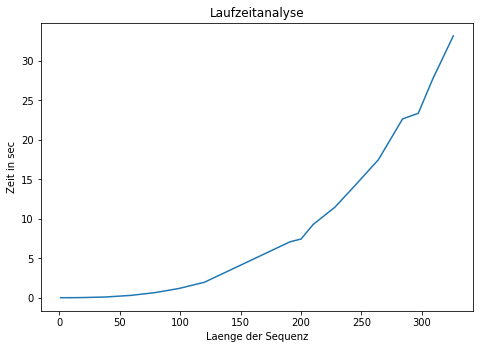

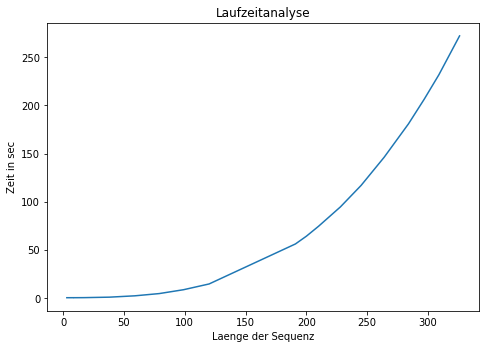

In [63]:
runs = 1
seqList = [None]
seqLenList = [None]
timeList = [None]
summe = 0
imgCounter = 0
for k in L[0:6]:
    for s in seq[10:11]:
        print(len(s))
        for i in range(runs):
            temp = LFSR.scalarMassey(s,k)
            summe += temp[0]
        seqList.append(temp[1])
        seqLenList.append(len(s))
        timeList.append(summe/runs)
        summe = 0
    saveImage(seqList, seqLenList, timeList, imgCounter)
    print(imgCounter)
    imgCounter += 1
    seqList.clear()
    timeList.clear()
    seqLenList.clear()

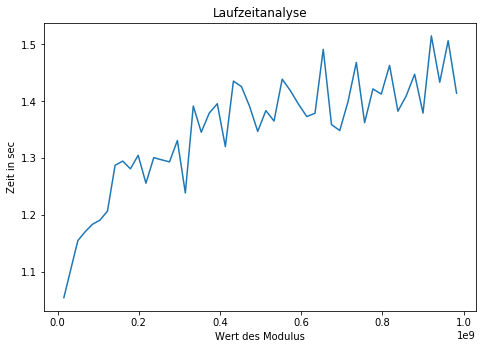

In [9]:
primList = [None]
timeList1 = [None]
summe = 0
runs = 10
for koerper in K[:97:2]:
    for i in range(runs):
        temp = LFSR.scalarMassey(seq[11],koerper)
        summe += temp[0]
    primList.append(temp[1])
    timeList1.append(summe/runs)
    summe = 0
saveImage(primList, timeList1, 0, 'Wert des Modulus')

(1.6084394454956055, 50)

[]

'Laufzeit_seq1.png'